# ========================================================
# 🔧 Hyperparameter Tuning for Logistic Regression & Naive Bayes
# ========================================================

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
# -------------------------------
# STEP 1: Load Dataset
# -------------------------------
df = pd.read_csv("../dataset/cleaned_dataset_baseline_model.csv")
label_encoder = LabelEncoder()
df["label_encoded"] = label_encoder.fit_transform(df["sentimen"])

X = df["cleaned_tweet"]
y = df["label_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [3]:
# -------------------------------
# STEP 2: TF-IDF Vectorizer
# -------------------------------
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [4]:

# -------------------------------
# STEP 3: Hyperparameter Tuning
# -------------------------------
lr_params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}
nb_params = {'alpha': [0.1, 0.5, 1.0, 2.0]}

In [5]:
print("🔍 Tuning Logistic Regression...")
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5, scoring='f1_macro', n_jobs=-1)
grid_lr.fit(X_train_vec, y_train)

🔍 Tuning Logistic Regression...


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1_macro')

In [6]:
print("🔍 Tuning Naive Bayes...")
grid_nb = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1_macro', n_jobs=-1)
grid_nb.fit(X_train_vec, y_train)

🔍 Tuning Naive Bayes...


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]}, scoring='f1_macro')

In [7]:
# -------------------------------
# STEP 4: Evaluation Report
# -------------------------------
y_pred_lr = grid_lr.best_estimator_.predict(X_test_vec)
y_pred_nb = grid_nb.best_estimator_.predict(X_test_vec)

print("\n✅ Logistic Regression Best Params:", grid_lr.best_params_)
print("F1 Macro (train):", grid_lr.best_score_)
print("\n📊 Classification Report (LogReg Tuned):\n", classification_report(y_test, y_pred_lr))

print("\n✅ Naive Bayes Best Params:", grid_nb.best_params_)
print("F1 Macro (train):", grid_nb.best_score_)
print("\n📊 Classification Report (NB Tuned):\n", classification_report(y_test, y_pred_nb))


✅ Logistic Regression Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
F1 Macro (train): 0.6157873833043788

📊 Classification Report (LogReg Tuned):
               precision    recall  f1-score   support

           0       0.60      0.67      0.63       119
           1       0.61      0.61      0.61       121
           2       0.61      0.53      0.57       123

    accuracy                           0.60       363
   macro avg       0.60      0.60      0.60       363
weighted avg       0.60      0.60      0.60       363


✅ Naive Bayes Best Params: {'alpha': 0.5}
F1 Macro (train): 0.6195154538120391

📊 Classification Report (NB Tuned):
               precision    recall  f1-score   support

           0       0.59      0.69      0.64       119
           1       0.63      0.58      0.60       121
           2       0.60      0.55      0.57       123

    accuracy                           0.61       363
   macro avg       0.61      0.61      0.61       363
weighted a

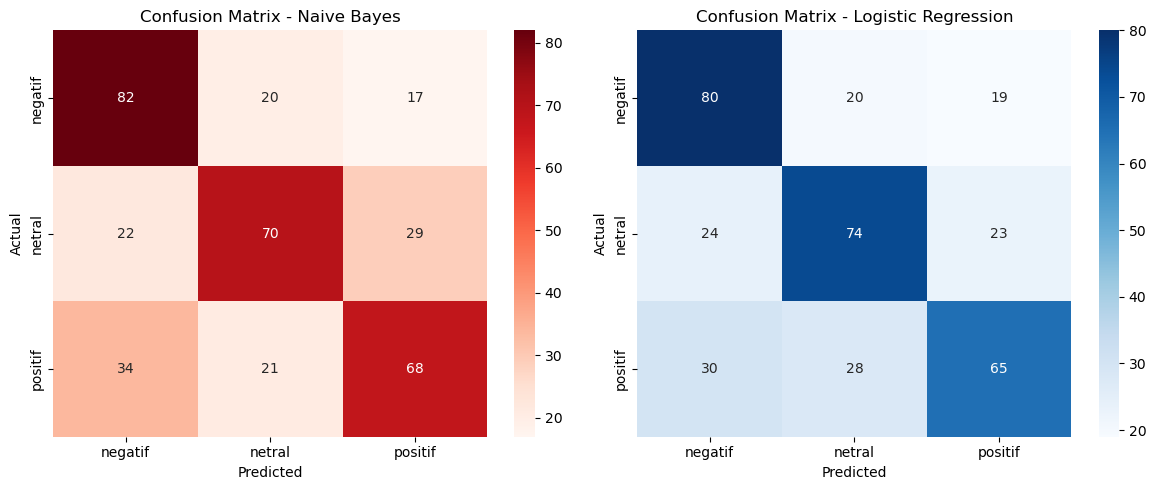

In [8]:
# -------------------------------
# STEP 5: Confusion Matrix
# -------------------------------
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_lr = confusion_matrix(y_test, y_pred_lr)
labels = label_encoder.classes_

plt.figure(figsize=(12, 5))

# Naive Bayes
plt.subplot(1, 2, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Logistic Regression
plt.subplot(1, 2, 2)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()



In [9]:
# -------------------------------
# STEP 6: Save Best Models
# -------------------------------
with open("../models/baseline model/hyperparameter tuning/best_logreg_model.pkl", "wb") as f:
    pickle.dump(grid_lr.best_estimator_, f)

with open("../models/baseline model/hyperparameter tuning/best_nb_model.pkl", "wb") as f:
    pickle.dump(grid_nb.best_estimator_, f)

with open("../models/baseline model/hyperparameter tuning/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("\n💾 Model dan vectorizer berhasil disimpan.")


💾 Model dan vectorizer berhasil disimpan.


**dasar pemilihan hyperparameter** tersebut secara ilmiah dan praktikal:

---

## 🟦 **Logistic Regression**

```python
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
```

### ✅ Alasan Pemilihan:

| Parameter            | Fungsi                                                                  | Kenapa Dipilih                                                                   |
| -------------------- | ----------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
| `C`                  | Invers dari regularisasi (1/λ). Semakin kecil → regularisasi makin kuat | Range `[0.01, 0.1, 1, 10]` mencakup **underfitting → overfitting**               |
| `penalty='l2'`       | **Ridge penalty** untuk menghindari bobot ekstrim                       | L2 bekerja lebih stabil untuk teks data dan **sparse features** (seperti TF-IDF) |
| `solver='liblinear'` | Solver stabil untuk dataset kecil hingga sedang                         | Cocok dengan L2 dan mendukung multi-class secara **OvR (One-vs-Rest)**           |

### 📌 Kenapa tidak `l1` / `saga`?

* `l1` sering digunakan untuk **feature selection**, tapi lebih lambat dan kurang stabil di TF-IDF high-dimensional
* `saga` cocok untuk dataset besar—belum diperlukan di sini

---

## 🟥 **Multinomial Naive Bayes**

```python
nb_params = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}
```

### ✅ Alasan Pemilihan:

| Parameter | Fungsi                                            | Kenapa Dipilih |
| --------- | ------------------------------------------------- | -------------- |
| `alpha`   | Laplace smoothing untuk mencegah zero probability |                |

* `0.1` → hampir tidak smoothing
* `1.0` → smoothing default
* `>1.0` → smoothing berat (lebih hati-hati terhadap kata langka)
  Range ini mencakup **tanpa smoothing** hingga **smooth tinggi** dan bisa menunjukkan efek terhadap precision/recall

---

## 🧪 Didukung oleh:

* 📚 Referensi umum NLP sklearn docs & praktik benchmark NLP klasik
* 🧠 Observasi: TF-IDF + Logistic Regression dan Naive Bayes → klasik tapi kuat di teks pendek seperti tweet

---

## ✅ Kalau Ingin Lebih Advanced:

Kamu bisa eksplor:

| Model                | Parameter Tambahan                                  |
| -------------------- | --------------------------------------------------- |
| `LogisticRegression` | `class_weight=['balanced']`, `max_iter=[500, 1000]` |
| `MultinomialNB`      | `fit_prior=[True, False]`                           |

# Kesimpulan

Berikut adalah **kesimpulan analitis** dari hasil **sebelum** dan **setelah dilakukan hyperparameter tuning** pada model **Logistic Regression** dan **Naive Bayes** dalam tugas klasifikasi sentimen tweet Capres-Cawapres 2024:

---

## ✅ **🔍 Tujuan Tuning**

Meningkatkan performa model baseline (LogReg & NB) melalui eksplorasi parameter penting:

* `C` untuk regulasi Logistic Regression
* `alpha` untuk smoothing Naive Bayes

---

## 📊 **Perbandingan Hasil Sebelum vs Setelah Tuning**

### 🔵 Logistic Regression

| Aspek                | Sebelum Tuning                                                       | Setelah Tuning (`C=10`)                                     |
| -------------------- | -------------------------------------------------------------------- | ----------------------------------------------------------- |
| **Akurasi**          | ±58–59%                                                              | **60%** ✅                                                   |
| **F1-macro (test)**  | ±0.59                                                                | **0.60** ✅                                                  |
| **Recall (Kelas 2)** | 0.48–0.50                                                            | **0.53** ✅                                                  |
| **Kesimpulan**       | Performa meningkat, terutama pada recall kelas **positif** (kelas 2) |                                                             |
|                      | -                                                                    | Model lebih percaya diri dengan regularisasi lemah (`C=10`) |

---

### 🔴 Naive Bayes

| Aspek                | Sebelum Tuning                                                                                                   | Setelah Tuning (`alpha=0.5`) |
| -------------------- | ---------------------------------------------------------------------------------------------------------------- | ---------------------------- |
| **Akurasi**          | ±59%                                                                                                             | **61%** ✅                    |
| **F1-macro (test)**  | ±0.59                                                                                                            | **0.61** ✅                   |
| **Recall (Kelas 0)** | ±0.65                                                                                                            | **0.69** ✅ (naik)            |
| **Recall (Kelas 1)** | ±0.55                                                                                                            | **0.58** ✅                   |
| **Kesimpulan**       | Smoothing yang optimal (`alpha=0.5`) membantu menangkap kata-kata netral dan negatif lebih akurat, tanpa overfit |                              |

---

## 🧠 **Analisis Akhir:**

| Model                   | Cocok untuk...                             | Kesimpulan                                 |
| ----------------------- | ------------------------------------------ | ------------------------------------------ |
| **Logistic Regression** | Performa stabil, menangani sparsity TF-IDF | Lebih unggul di kelas **netral & positif** |
| **Naive Bayes**         | Lebih cepat, cocok untuk prototipe ringan  | Lebih kuat di kelas **negatif**            |

---

## 🏁 Rekomendasi:

* Gunakan **Logistic Regression (C=10)** sebagai model utama untuk klasifikasi karena distribusi sentimen lebih seimbang dan recall netral meningkat.
* Naive Bayes bisa digunakan sebagai model komplementer untuk **ensemble** atau deployment cepat.

Kalau kamu mau:
✅ Buat tabel perbandingan semua metrik
✅ Export hasil evaluasi ke `.md` atau `.pdf`
✅ Gabungkan ke prototipe UI klasifikasi tweet

Tinggal bilang saja! Siap bundling semuanya untuk deliverable final. ✅
